In [90]:
%matplotlib inline

import matplotlib.pyplot as plt

import densityGC
import densityFG
import gcSampler
import numpy as np
import scipy
import triangle
import colorKDE

reload(densityGC)
reload(densityFG)
reload(gcSampler)

<module 'gcSampler' from 'gcSampler.pyc'>

In [91]:
data = np.loadtxt('n3115_phot_data.csv',delimiter=',')
colors = np.vstack((data[:,0],data[:,1])).T
coords = np.vstack((data[:,2],data[:,3])).T
data_in = (colors,coords)
sampler = gcSampler.gcSampler(30,max_rad = 10.0,\
                             radial_profile='exponential',fractions=np.array([0.1,0.15,.75]),fixed_cov=False,\
                             ellipticity=True,n_pop=2,n_source=2000,mock=True,mock_fg_only=True,\
                             spatial=np.array([40.0,0.7,0.81]))

In [92]:
colors.shape

(623, 2)

In [93]:
print sampler.theta_init

[  1.00000000e-01   1.50000000e-01   1.03000000e+00   3.00000000e-01
   9.00000000e-03   2.70000000e-03   4.20000000e-03   7.50000000e-01
   1.90000000e-01   8.20000000e-03   1.80000000e-03   3.10000000e-03
   4.00000000e+01   7.00000000e-01   8.10000000e-01]


In [94]:
sampler.runSampler(10000,burn_steps=5000)

f_gc median,  16 %, and  84 %  0.0976072902877    0.0816152006077    0.115808045575
f_gc_2 median,  16 %, and  84 %  0.128285434138    0.111949719217    0.145308606523
mu_gi_1 median,  16 %, and  84 %  1.0229664001    0.998483301403    1.04560567171
mu_ri_1 median,  16 %, and  84 %  0.301081518631    0.287971943958    0.313853063334
sig_gi_1 median,  16 %, and  84 %  0.0134198109228    0.00961688902313    0.0185698362347
sig_ri_1 median,  16 %, and  84 %  0.00407194298885    0.00289358138947    0.00539729397468
cov_1 median,  16 %, and  84 %  0.00690619078144    0.00483767353525    0.00946463135833
mu_gi_2 median,  16 %, and  84 %  0.749875929374    0.737626556939    0.762605272754
mu_ri_2 median,  16 %, and  84 %  0.191947387949    0.18812041282    0.196057980695
sig_gi_2 median,  16 %, and  84 %  0.00754582290774    0.00619104650817    0.0093280146586
sig_ri_2 median,  16 %, and  84 %  0.00159375159079    0.00136038542525    0.00187968691779
cov_2 median,  16 %, and  84 %  0.00273601

In [95]:
sampler.sampler.acceptance_fraction

array([ 0.3435,  0.3254,  0.3277,  0.3219,  0.3334,  0.3317,  0.3356,
        0.3269,  0.3275,  0.3283,  0.3294,  0.3256,  0.3278,  0.3279,
        0.3302,  0.3346,  0.3272,  0.3366,  0.3182,  0.3354,  0.3168,
        0.3188,  0.3295,  0.334 ,  0.3197,  0.3326,  0.3254,  0.3315,
        0.3364,  0.3287])

Quantiles:
[(0.16, 0.081615200607669913), (0.5, 0.097607290287699919), (0.84, 0.1158080455749553)]
Quantiles:
[(0.16, 0.11194971921650468), (0.5, 0.12828543413822369), (0.84, 0.14530860652330252)]
Quantiles:
[(0.16, 0.99848330140314312), (0.5, 1.0229664000974494), (0.84, 1.0456056717146023)]
Quantiles:
[(0.16, 0.28797194395806397), (0.5, 0.30108151863108157), (0.84, 0.3138530633340072)]
Quantiles:
[(0.16, 0.0096168890231349939), (0.5, 0.013419810922836178), (0.84, 0.01856983623469784)]
Quantiles:
[(0.16, 0.0028935813894679112), (0.5, 0.0040719429888466307), (0.84, 0.0053972939746791725)]
Quantiles:
[(0.16, 0.0048376735352468119), (0.5, 0.006906190781438129), (0.84, 0.0094646313583302156)]
Quantiles:
[(0.16, 0.73762655693938539), (0.5, 0.74987592937385883), (0.84, 0.76260527275380108)]
Quantiles:
[(0.16, 0.18812041282027522), (0.5, 0.19194738794894728), (0.84, 0.19605798069467495)]
Quantiles:
[(0.16, 0.0061910465081678441), (0.5, 0.0075458229077373477), (0.84, 0.0093280146585998265)]
Qu

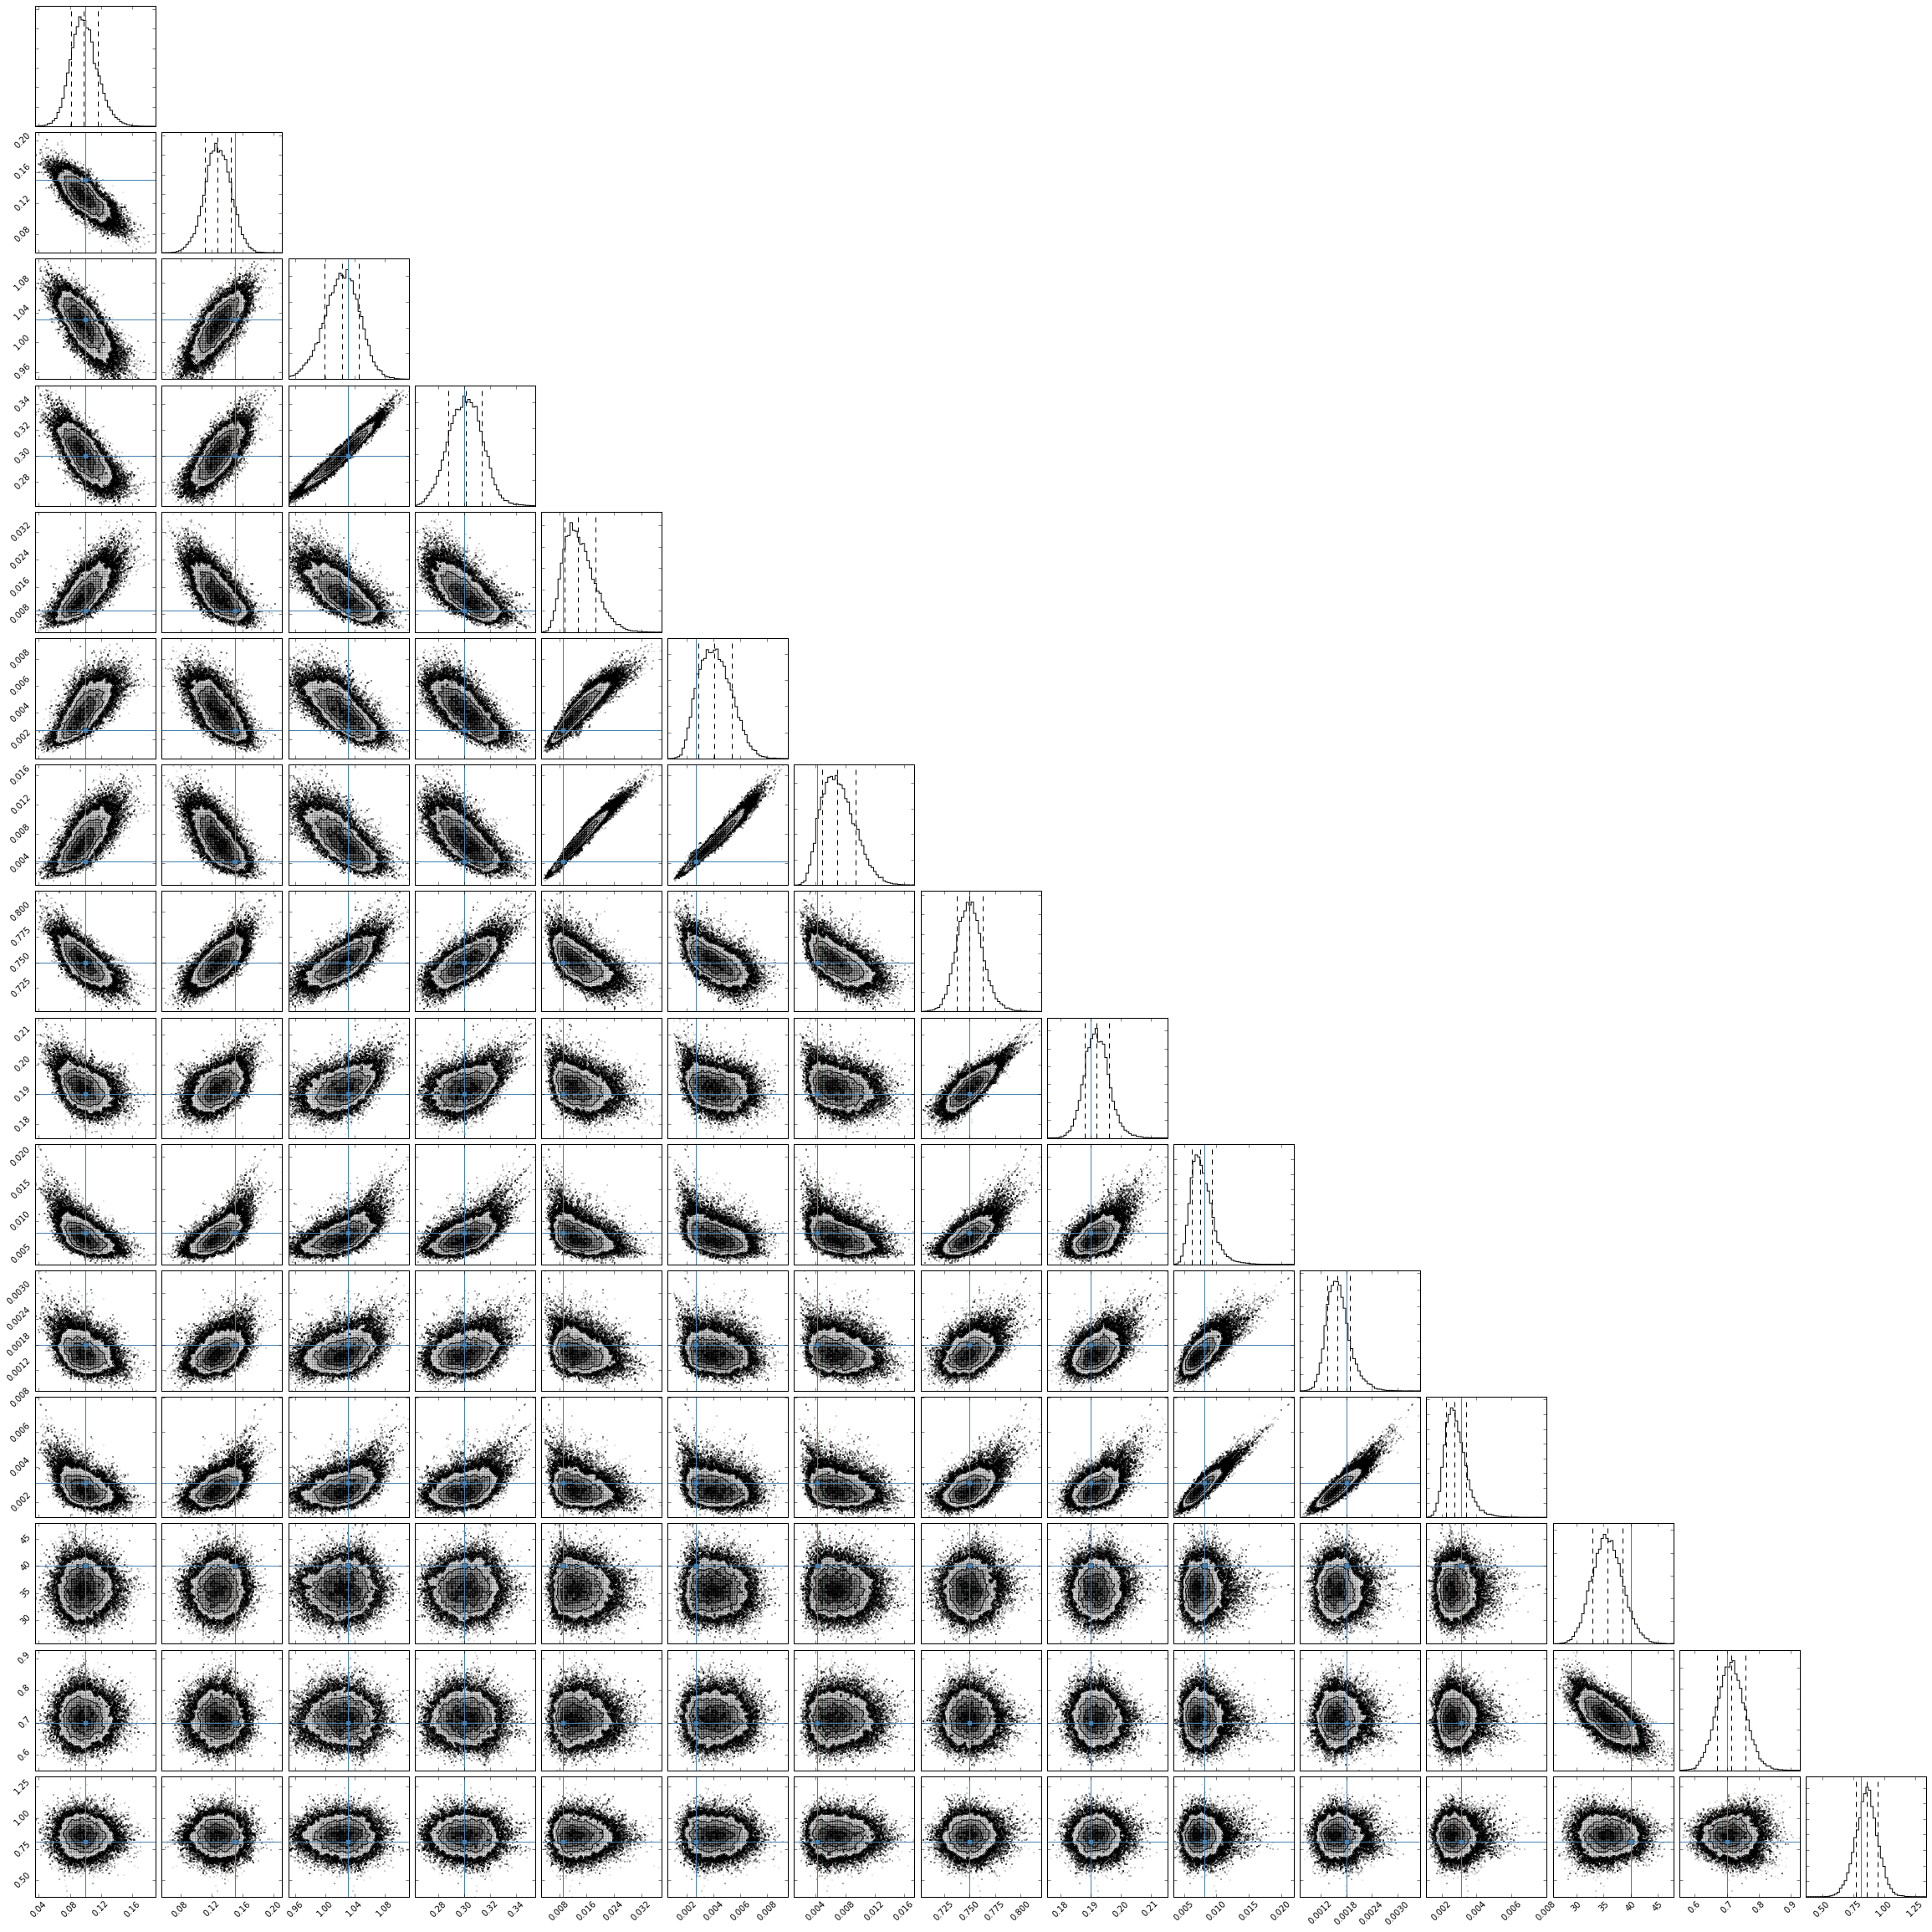

In [96]:
fig = triangle.corner(sampler.chain[:,:,:].reshape(-1,15),quantiles=[0.16, 0.5, 0.84],truths=sampler.theta_init)
fig.savefig('full_mock_triangle.png')

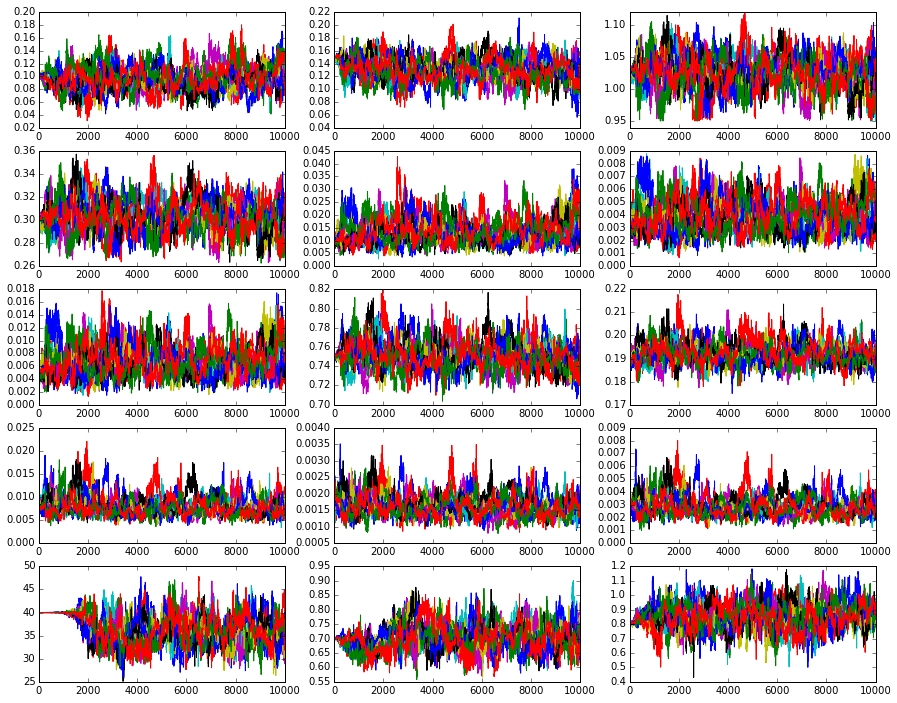

In [97]:
fig,ax = plt.subplots(figsize=(15,12),ncols=3,nrows=5,dpi=1000)

for i in range(15):
    for j in range(10):
        ax[i/3,i%3].plot(sampler.sampler.chain[j*3,:,i])
        
fig.savefig('full_mock_data_traces.png')

In [98]:
sampler.chain.shape

(30, 5000, 15)

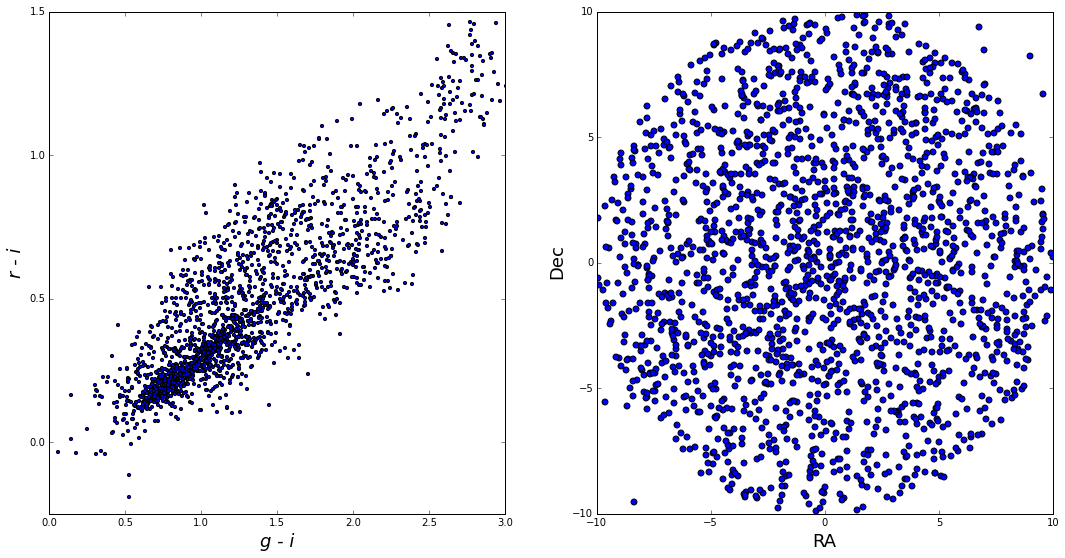

In [99]:
gi = sampler.data[0][:,0]
ri = sampler.data[0][:,1]

x = sampler.data[1][:,0]
y = sampler.data[1][:,1]

fig,ax = plt.subplots(figsize=(18,9),ncols=2)

#ax.set_xlim([-10,10])
#ax.set_ylim([-10,10])
#gcLike = gc.lnLike(sampler.data)
#fgLike = fg.lnLike(sampler.data)

#gcs = sampler.p_gc > 0.5

ax[1].scatter(x,y,s=35)#,c=sampler.p_gc,s=35)
probs = ax[0].scatter(gi[::-1],ri[::-1],s=10)#,c=sampler.p_gc[::-1],s=10)
ax[0].set_xlim(0.0,3.0)
ax[0].set_ylim(-0.25,1.5)
ax[1].set_xlim(-10,10)
ax[1].set_ylim(-10,10)
ax[0].set_xlabel('g - i',fontsize=18,fontstyle='italic')
ax[0].set_ylabel('r - i',fontsize=18,fontstyle='italic')
ax[1].set_xlabel('RA',fontsize=18)
ax[1].set_ylabel('Dec',fontsize=18)
#fig.subplots_adjust(right=0.9)
#cbaxes = fig.add_axes([0.9, 0.05, 0.03, 0.8]) 
#fig.colorbar(probs, ax=ax.ravel().tolist())

fig.savefig('mock_data_no_color.png')

In [46]:
gi[::-1]

array([ 2.0272474 ,  1.10998307,  1.90863645, ...,  1.06355026,
        0.71289936,  1.17058361])

In [53]:
test_data = gcSampler.readTestData()
mock_fg_color,mock_fg_coordinates = sampler.fg.genMock(n=1000)

In [57]:
print mock_fg_color.shape
print test_data[0].shape

(1000, 2)
(235, 2)


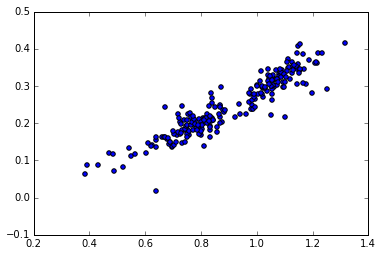

In [42]:
plt.scatter(test_data[0][:,0],test_data[0][:,1])